In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [2]:
cd drive/MyDrive

/content/drive/MyDrive


In [14]:
# knock60

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [10]:
# knock61

print(model.similarity('United_States', 'U.S.'))

0.73107743


In [11]:
# knock62

print(model.most_similar('United_States', topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


In [12]:
# knock63

print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


In [14]:
# knock64

with open("questions-words.txt", "r") as f1, open("questions-words_new.txt", "w") as f2:
  for line in f1:
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1],line[2]], negative=[line[0]], topn=1)[0]
      f2.write(" ".join([category] + line + [word, str(cos), '\n']))

In [5]:
# knock65
from tqdm import tqdm

with open("questions-words_new.txt", "r") as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith("gram"):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1
print('意味的アナロジー：' + str(sem_cor / sem_cnt))
print('文法的アナロジー：' + str(syn_cor / syn_cnt))

意味的アナロジー：0.7308602999210734
文法的アナロジー：0.7400468384074942


In [12]:
!wget --no-check-certificate https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-06-12 02:21:58--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0.08s   

2023-06-12 02:21:58 (281 KB/s) - ‘wordsim353.zip.1’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [15]:
# knock66
import numpy as np
from scipy.stats import spearmanr

ws353 = []
with open("combined.csv", "r") as f:
  next(f)
  for line in f:
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)
human = np.array(ws353).T[2]
word2vec = np.array(ws353).T[3]
correlation, p = spearmanr(human, word2vec)
print("スピアマン相関係数：" + str(correlation))

スピアマン相関係数：0.6849564489532377


In [27]:
# knock67
import pandas as pd
from sklearn.cluster import KMeans

# 国の抽出
countries = set()
with open("questions-words_new.txt") as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)
# ベクトルの作成
countries_vec = [model[country] for country in countries]
# k-means法
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
  cluster = np.where(kmeans.labels_ == i)[0]
  print(f'cluster:{i}')
  print(', '.join([countries[k] for k in cluster]))

cluster:0
Belgium, Austria, Italy, Greenland, USA, Switzerland, Australia, Europe, Korea, Ireland, Liechtenstein, Portugal, Denmark, France, Germany, Netherlands, Spain, England, Sweden, Iceland, Norway, Canada, Finland, Japan
cluster:1
Tuvalu, Venezuela, Guyana, Ecuador, Chile, Uruguay, Belize, Brazil, Taiwan, Argentina, Peru, Philippines, Jamaica, Samoa, Dominica, Colombia, Mexico, Nicaragua, Suriname, Honduras, Bahamas, Cuba, Fiji
cluster:2
Croatia, Moldova, Malta, Estonia, Romania, Armenia, Kazakhstan, Ukraine, Macedonia, Cyprus, Russia, Lithuania, Slovakia, Turkey, Slovenia, Georgia, Montenegro, Belarus, Poland, Serbia, Greece, Bulgaria, Hungary, Latvia, Albania, Azerbaijan
cluster:3
Indonesia, Bahrain, Uzbekistan, Turkmenistan, Israel, Kyrgyzstan, Libya, Tajikistan, Iraq, China, Iran, Qatar, Malaysia, Jordan, Laos, Syria, India, Lebanon, Afghanistan, Morocco, Vietnam, Oman, Bhutan, Pakistan, Thailand, Bangladesh, Cambodia, Nepal, Egypt
cluster:4
Botswana, Malawi, Niger, Guinea, Z

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


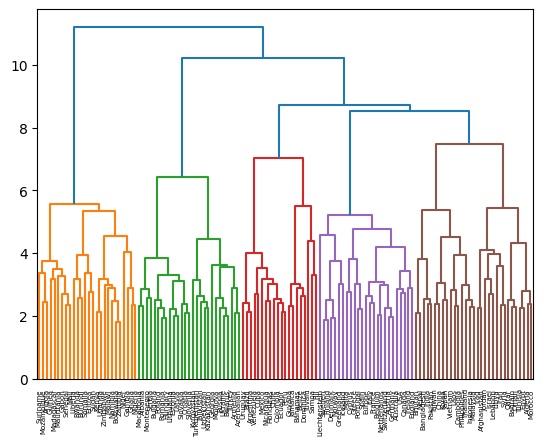

<Figure size 1000x1000 with 0 Axes>

In [43]:
# knock68
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)

plt.figure(figsize=(10,10))
plt.show()

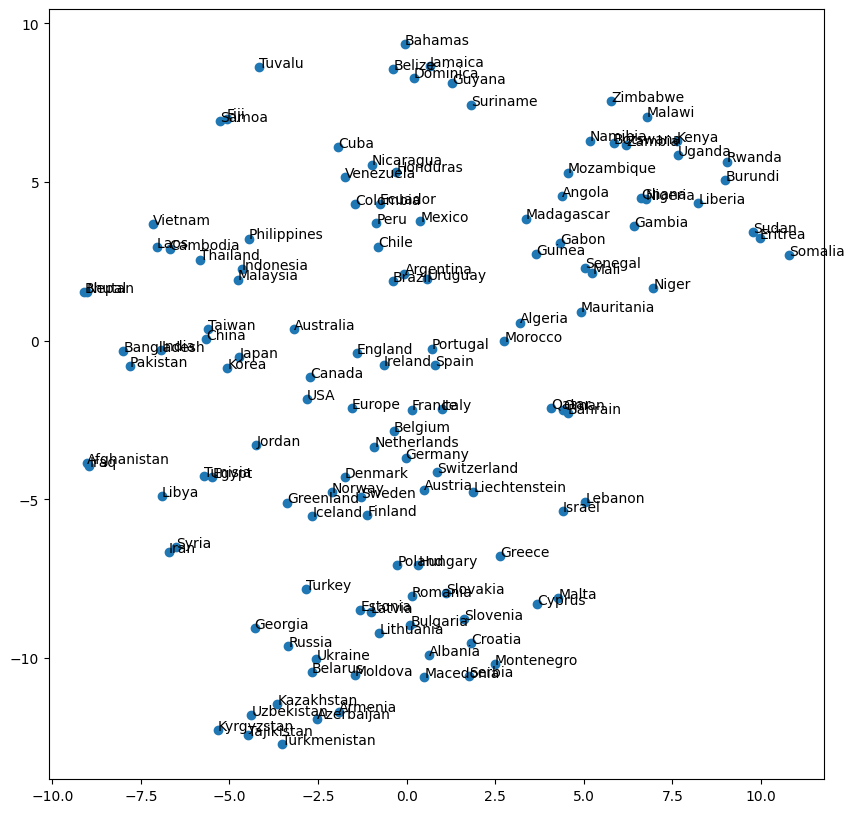

In [42]:
# knock69
from sklearn.manifold import TSNE

countries_vec = np.array(countries_vec)
tsne = TSNE()
embs = tsne.fit_transform(countries_vec)
plt.figure(figsize=(10,10))
plt.scatter(np.array(embs).T[0], np.array(embs).T[1])
for (x, y), name in zip(embs, countries):
  plt.annotate(name, (x, y))
plt.show()